In [ ]:
import torch
import torch.nn as nn
from torch.optim import Adam
import torchvision
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Generator
class Generator(nn.Module):
  def __int__(self, latent_size=100):
    super(Generator,self).__init__()
    self.layers=nn.Sequential(nn.ConvTranspose2d(latent_size,1024, 4,1,0,bias=False),
    nn.BatchNorm2d(1024),
    nn.ReLU(True),


    nn.ConvTranspose2d(1024, 512, 4,2,1,bias=False),   #4x4
    nn.BatchNorm2d(512),
    nn.ReLU(True),

    nn.ConvTranspose2d(512, 256, 4,2,1,bias=False),  #8x8
    nn.BatchNorm2d(512),
    nn.ReLU(True),

    nn.ConvTranspose2d(256, 128, 4,2,1,bias=False),     #16x16
    nn.BatchNorm2d(512),
    nn.ReLU(True),

    nn.ConvTranspose2d(128, 1, 4,2,1,bias=False),   #32x32
    nn.BatchNorm2d(512),
    nn.Tanh()
    )

  def __call__(self, latent_space):
    return self.forward(latent_space)


  def forward(self, latent_space):
    return self.layers(latent_space.cuda())

#Discriminator

class Discriminator(nn.Module):
  def __int__(self):
    super(Discriminator,self).__init__()
    self.layers=nn.Sequential(nn.Conv2d(1,128, 4,2,1,bias=False),
    nn.LeakyReLU(0, 2, inplace=True),

#32x32
    nn.Conv2d(128, 256, 4,2,1,bias=False),   #4x4
    nn.BatchNorm2d(256),
    nn.LeakyReLU(0, 2, inplace=True),
#16x16
    nn.Conv2d(256, 512, 4,2,1,bias=False),  #8x8
    nn.BatchNorm2d(512),
    nn.LeakyReLU(0, 2, inplace=True),
#8x8
    nn.Conv2d(512, 1024, 4,2,1,bias=False),     #16x16
    nn.BatchNorm2d(1024),
    nn.LeakyReLU(0, 2, inplace=True),
#4x4
    nn.Conv2d(1024, 1, 1, 4,1,0,bias=False),   #32x32
    nn.Sigmoid()
    )

  def __call__(self, img):
    return self.forward(img)


  def forward(self, img):
    return self.layers(img.cuda())

In [ ]:
!pip install array2gif

In [ ]:
def plot_epoch(images, n=36):

  if not isinstance(images, np.ndarray):
    images=images.detach().numpy()

  rowcols= int(np.sqrt(n))
  plt.figure(figsize=(rowcols, rowcols))


  for index in range(n):
    plt.subplot(rowcols, rowcols, index + 1)
    plt.imshow(images[index,0 , : , :], cmap='binary')
    plt.axis('off')
  plt.show()

In [ ]:
# import sys
# import os
# from torchvision import transforms
# from torchvision.datasets import MNIST
# from array2gif import write_gif

# LATENT_SIZE=100
# EPOCH_SIZE=10
# ROW_NUM=6

# try:
#   data_path=os.path.join(os.path.abspath(os.environ['CONDA_PREFIX']),'datasets')
# except KeyError:
#   data_path=os.path.join(os.path.abspath(os.environ['HOME']),'datasets')

# try:
#   torchvision.datasets.MNIST(root=data_path, download=False)
# except RuntimeError or KeyError:
#   if not os.path.isdir(data_path):
#     os.makedirs(data_path)
#   torchvision.datasets.MNIST(root=data_path,
#                               download=True)

# def weights_init(m):
#    classname = m.__class__.__name__
#    if classname.find("Conv") != -1:
#        torch.nn.init.normal_(m.weight.data, 0.0, 0.02)
#    elif classname.find("BatchNorm2d") != -1:
#        torch.nn.init.normal_(m.weight.data, 1.0, 0.02)
#        torch.nn.init.constant_(m.bias.data, 0.0)

# dataset = torchvision.datasets.MNIST(root=data_path, download=True)
# dataset.transform= transforms.Compose([transforms.ToTensor(), transforms.Normalize(mean=(0.5,),std = (0.5,)),
#                                        transforms.Resize(64)]) #

# batch_size=128
# data_loader=torch.utils.data.DataLoader(dataset=dataset, batch_size=batch_size, shuffle=True, drop_last=True)

# device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# print('Device is :' + str(device))

# criterion=nn.BCELoss()
# discriminator = Discriminator().to(device).apply(weights_init)
# generator     = Generator().to(device).apply(weights_init)


# optim_d = Adam(discriminator.parameters(), lr = 0.00005)
# optim_g = Adam(generator.parameters(),     lr = 0.00005)


# gif_array = []*EPOCH_SIZE
# total_step = len(data_loader)
# for epoch in range(EPOCH_SIZE):
#    for step, (imgs, _) in enumerate(data_loader):


#        # Create Fake and Real Labels
#        real_labels = torch.ones(batch_size, 1,1,1).to(device)
#        fake_labels = torch.zeros(batch_size, 1,1,1).to(device)


#        # ================================================================== #
#        #                      Train the discriminator                       #
#        # ================================================================== #
#        outputs     = discriminator(imgs)
#        d_loss_real = criterion(outputs, real_labels)
#        real_score = outputs


#        # BCE on fake images
#        lat_space   = torch.randn(batch_size, LATENT_SIZE, 1, 1).to(device)
#        fake_images = generator(lat_space)
#        outputs     = discriminator(fake_images)
#        d_loss_fake = criterion(outputs, fake_labels)
#        fake_score  = outputs


#        # Backprop and optimize
#        d_loss = d_loss_real + d_loss_fake
#        optim_d.zero_grad()
#        optim_g.zero_grad()
#        d_loss.backward()
#        optim_d.step()


#        # ================================================================== #
#        #                        Train the generator                         #
#        # ================================================================== #


#        # Compute loss with fake images
#        lat_space = torch.randn(batch_size, LATENT_SIZE, 1, 1).to(device)
#        fake_images = generator(lat_space)
#        outputs = discriminator(fake_images)


#        # We train G to maximize log(D(G(z)) instead of minimizing log(1-D(G(z)))
#        g_loss = criterion(outputs, real_labels)


#        # Backprop and optimize
#        optim_d.zero_grad()
#        optim_g.zero_grad()
#        g_loss.backward()
#        optim_g.step()

#        if (step+1) % 80 == 0:
#            print('Epoch [{}/{}], Step [{}/{}], d_loss: {:.4f}, g_loss: {:.4f}, D(x): {:.2f}, D(G(z)): {:.2f}'
#                    .format(epoch, EPOCH_SIZE,
#                            step+1, total_step,
#                            d_loss.item(),
#                            g_loss.item(),
#                            real_score.mean().item(),
#                            fake_score.mean().item()))
#            plot_epoch(fake_images.cpu())
#            array_2_make_grid = ((fake_images.cpu()[0:ROW_NUM**2, :, :, :] + 1) * (1/2) * 255).type(torch.uint8)
#            gif_array.append(torchvision.utils.make_grid(array_2_make_grid, nrow = ROW_NUM).numpy())
#            write_gif(gif_array, filename = 'dcgan_10_fps.gif', fps = 10)


Device is :cuda


ValueError: optimizer got an empty parameter list

In [ ]:
class Generator(nn.Module):
 def __init__(self, latent_size = 100):
   super(Generator, self).__init__()


   self.layers = nn.Sequential(nn.ConvTranspose2d(latent_size, 1024, 4,1,0,bias=False),
                          nn.BatchNorm2d(1024),
                          nn.ReLU(True),
                          # 4x4
                          nn.ConvTranspose2d(1024, 512, 4, 2, 1, bias=False),
                          nn.BatchNorm2d(512),
                          nn.ReLU(True),
                          # 8x8
                          nn.ConvTranspose2d(512, 256, 4, 2, 1, bias=False),
                          nn.BatchNorm2d(256),
                          nn.ReLU(True),
                          # 16 x 16
                          nn.ConvTranspose2d(256, 128, 4, 2, 1, bias=False),
                          nn.BatchNorm2d(128),
                          nn.ReLU(True),
                          # 32 x 32
                          nn.ConvTranspose2d(128, 1, 4, 2, 1, bias=False),
                          nn.Tanh()
                          # 64 x 64
                          )
 def __call__(self, latent_space):
     return self.forward(latent_space)

 def forward(self, latent_space):
     return self.layers(latent_space.cuda())





class Discriminator(nn.Module):
 def __init__(self):
   super(Discriminator, self).__init__()
   # 64x64
   self.layers = nn.Sequential(nn.Conv2d(1, 128, 4,2,1,bias=False),
                          nn.LeakyReLU(0.2, inplace=True),
                          # 32x32
                          nn.Conv2d(128, 256, 4, 2, 1, bias=False),
                          nn.BatchNorm2d(256),
                          nn.LeakyReLU(0.2, inplace=True),
                          # 16 x 16
                          nn.Conv2d(256, 512, 4, 2, 1, bias=False),
                          nn.BatchNorm2d(512),
                          nn.LeakyReLU(0.2, inplace=True),
                          # 8 x 8
                          nn.Conv2d(512, 1024, 4, 2, 1, bias=False),
                          nn.BatchNorm2d(1024),
                          nn.LeakyReLU(0.2, inplace=True),
                          # 4 x 4
                          nn.Conv2d(1024, 1, 4, 1, 0, bias=False),
                          nn.Sigmoid()
                          # 1 x 1
                         )
 def __call__(self, img):
     return self.forward(img)

 def forward(self, img):
     return self.layers(img.cuda())

In [ ]:
def plot_epoch(images, n=36):
   '''
   Visualize a single epoch of images
   Parameters
   ----------
   images : numpy.ndarray
            images of shape (b, c, x, y)
   n      : int, default: 36
            number of images to display. Must be a square number
   '''


   if not isinstance(images, np.ndarray):
       images = images.detach().numpy()


   rowcols = int(np.sqrt(n))  # Convert rowcols to an integer
   plt.figure(figsize=(rowcols, rowcols))
   for index in range(n):
       plt.subplot(rowcols, rowcols, index + 1)
       plt.imshow(images[index, 0, :, :], cmap="binary")
       plt.axis("off")
   plt.show()


Device is: cuda
Epoch [0/10], Step [80/468], d_loss: 0.0180, g_loss: 8.8311, D(x): 1.00, D(G(z)): 0.01


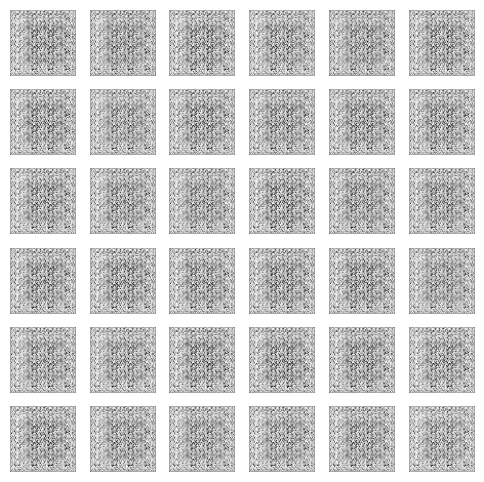

Epoch [0/10], Step [160/468], d_loss: 0.0054, g_loss: 8.6135, D(x): 1.00, D(G(z)): 0.00


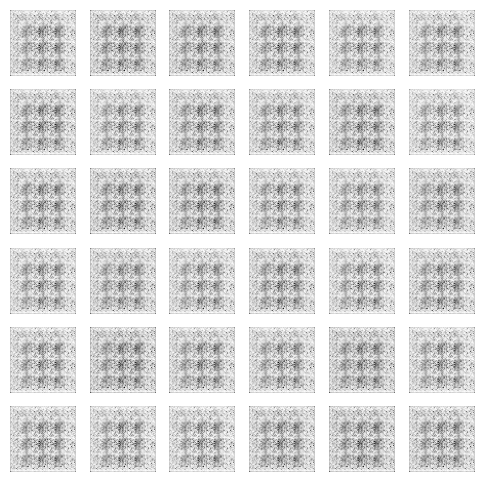

Epoch [0/10], Step [240/468], d_loss: 0.0061, g_loss: 8.3238, D(x): 1.00, D(G(z)): 0.00


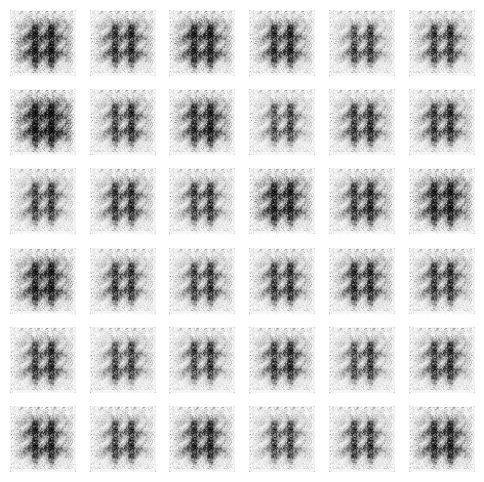

Epoch [0/10], Step [320/468], d_loss: 0.0035, g_loss: 8.4257, D(x): 1.00, D(G(z)): 0.00


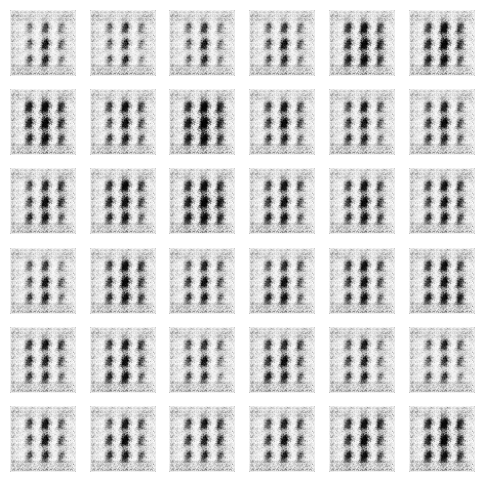

Epoch [0/10], Step [400/468], d_loss: 0.0096, g_loss: 6.1687, D(x): 1.00, D(G(z)): 0.01


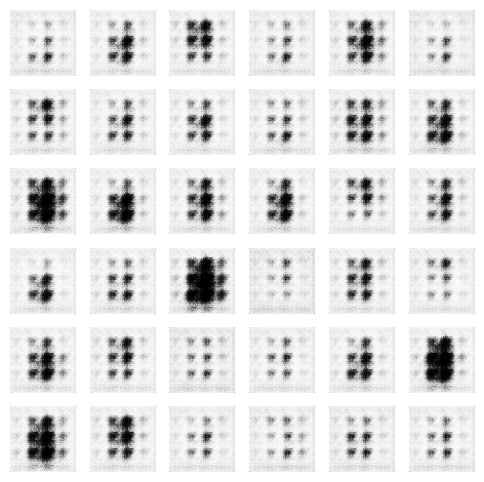

Epoch [1/10], Step [80/468], d_loss: 0.0035, g_loss: 8.4563, D(x): 1.00, D(G(z)): 0.00


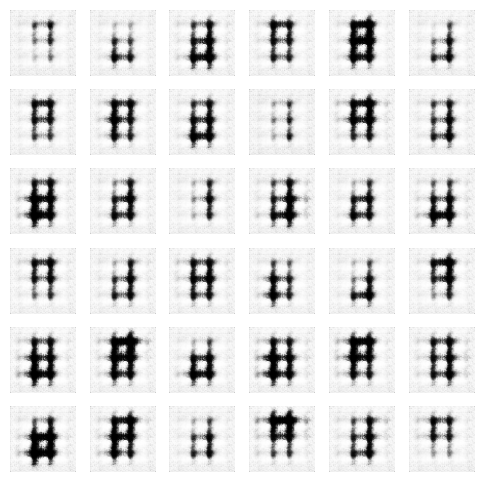

Epoch [1/10], Step [160/468], d_loss: 0.0023, g_loss: 7.7116, D(x): 1.00, D(G(z)): 0.00


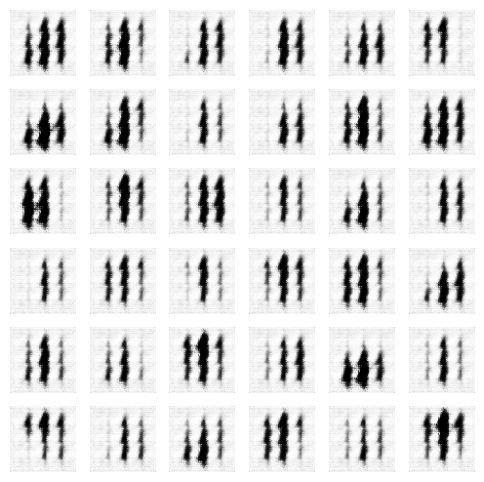

KeyboardInterrupt: 

In [ ]:
import sys
import os
from torchvision import transforms
from torch.optim import Adam
from torchvision.datasets import MNIST
from array2gif import write_gif


LATENT_SIZE = 100
EPOCH_SIZE  = 10
ROW_NUM     = 6
try:
 data_path = os.path.join(os.path.abspath(os.environ["CONDA_PREFIX"]),
                         'datasets')
except KeyError:
   data_path = os.path.join(os.path.abspath(os.environ["HOME"]),
                        'datasets')
# We make sure that the dataset is actually available
try:
   torchvision.datasets.MNIST(root=data_path,
                              download=False)
except RuntimeError or KeyError:
   if not os.path.isdir(data_path):
           os.makedirs(data_path)
   torchvision.datasets.MNIST(root=data_path,
                              download=True)


def weights_init(m):
   classname = m.__class__.__name__
   if classname.find("Conv") != -1:
       torch.nn.init.normal_(m.weight.data, 0.0, 0.02)
   elif classname.find("BatchNorm2d") != -1:
       torch.nn.init.normal_(m.weight.data, 1.0, 0.02)
       torch.nn.init.constant_(m.bias.data, 0.0)




dataset = torchvision.datasets.MNIST(root=data_path,download=True)
dataset.transform = transforms.Compose([transforms.ToTensor(),
                                       transforms.Normalize(mean = (0.5,),
                                                            std = (0.5,)),
                                       transforms.Resize(64)])




# Data Loader
batch_size = 128
data_loader = torch.utils.data.DataLoader(dataset=dataset,
                                         batch_size=batch_size,
                                         shuffle=True, drop_last=True)
# Device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("Device is: " + str(device))


criterion = nn.BCELoss()


discriminator = Discriminator().to(device).apply(weights_init)
generator     = Generator().to(device).apply(weights_init)


optim_d = Adam(discriminator.parameters(), lr = 0.00005)
optim_g = Adam(generator.parameters(),     lr = 0.00005)


gif_array = []*EPOCH_SIZE
total_step = len(data_loader)
for epoch in range(EPOCH_SIZE):
   for step, (imgs, _) in enumerate(data_loader):


       # Create Fake and Real Labels
       real_labels = torch.ones(batch_size, 1,1,1).to(device)
       fake_labels = torch.zeros(batch_size, 1,1,1).to(device)


       # ================================================================== #
       #                      Train the discriminator                       #
       # ================================================================== #
       outputs     = discriminator(imgs)
       d_loss_real = criterion(outputs, real_labels)
       real_score = outputs


       # BCE on fake images
       lat_space   = torch.randn(batch_size, LATENT_SIZE, 1, 1).to(device)
       fake_images = generator(lat_space)
       outputs     = discriminator(fake_images)
       d_loss_fake = criterion(outputs, fake_labels)
       fake_score  = outputs


       # Backprop and optimize
       d_loss = d_loss_real + d_loss_fake
       optim_d.zero_grad()
       optim_g.zero_grad()
       d_loss.backward()
       optim_d.step()


       # ================================================================== #
       #                        Train the generator                         #
       # ================================================================== #


       # Compute loss with fake images
       lat_space = torch.randn(batch_size, LATENT_SIZE, 1, 1).to(device)
       fake_images = generator(lat_space)
       outputs = discriminator(fake_images)


       # We train G to maximize log(D(G(z)) instead of minimizing log(1-D(G(z)))
       g_loss = criterion(outputs, real_labels)


       # Backprop and optimize
       optim_d.zero_grad()
       optim_g.zero_grad()
       g_loss.backward()
       optim_g.step()

       if (step+1) % 80 == 0:
           print('Epoch [{}/{}], Step [{}/{}], d_loss: {:.4f}, g_loss: {:.4f}, D(x): {:.2f}, D(G(z)): {:.2f}'
                   .format(epoch, EPOCH_SIZE,
                           step+1, total_step,
                           d_loss.item(),
                           g_loss.item(),
                           real_score.mean().item(),
                           fake_score.mean().item()))
           plot_epoch(fake_images.cpu())
           array_2_make_grid = ((fake_images.cpu()[0:ROW_NUM**2, :, :, :] + 1) * (1/2) * 255).type(torch.uint8)
           gif_array.append(torchvision.utils.make_grid(array_2_make_grid, nrow = ROW_NUM).numpy())
           write_gif(gif_array, filename = 'dcgan_10_fps.gif', fps = 10)